In [1]:
import importlib
%load_ext autoreload

import sys
import os
sys.path.append(os.path.abspath("../.."))

import mypackage
import mypackage.elastic
import mypackage.sentence
import mypackage.clustering

from sentence_transformers import SentenceTransformer

2025-05-08 14:47:33.774693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746704853.792208   12204 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746704853.796873   12204 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
#doc = mypackage.elastic.Document.from_json("../cached_docs/pubmed_0001.json", text_path="article")
doc = mypackage.elastic.ElasticDocument(mypackage.elastic.Session("pubmed-index", credentials_path="../credentials.json", cert_path="../http_ca.crt"), 1923, text_path="article")

FileNotFoundError: [Errno 2] No such file or directory: '../credentials.json'

In [3]:
sentences = mypackage.sentence.doc_to_sentences(doc, model)
merged = mypackage.sentence.iterative_merge(sentences, threshold=0.6, round_limit=None, pooling_method="average")

Fetching Document(ID=1923)


In [4]:
%autoreload 2

print(len(merged))

labels, clusters = mypackage.clustering.chain_clustering(merged, n_components=25)
print(len(clusters))

83
7


/home/zoukos/ceid/final/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


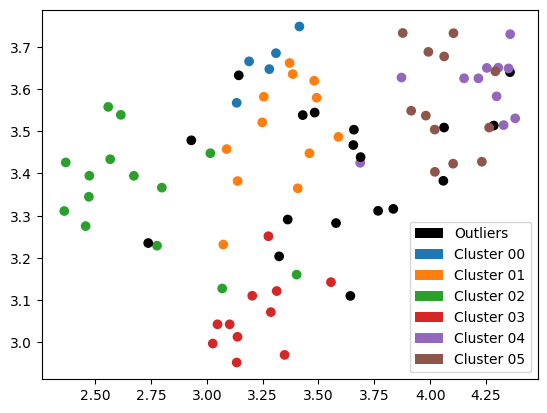

In [5]:
mypackage.clustering.visualize_clustering(merged, labels)

In [6]:
from rich.panel import Panel
from rich.console import Console

console = Console()

for cluster in clusters.items():
    text = "\n\n".join([chain.text for chain in cluster[1]])
    console.print(Panel(text, title = f"Cluster {cluster[0]:02}",border_style="cyan bold"))

╭────────────────────────────────────────────────── Cluster 03 ───────────────────────────────────────────────────╮
│ in the last decade , a rapid growth of the prevalence of obesity was experienced worldwide , the importance of  │
│ which can be best illustrated with the forecast that this phenomenon could reverse the increase in life         │
│ expectancy having been observed in the past decades . similar trends of obesity epidemic were also observed in  │
│ the child population , which made it a worldwide public health crisis . later consequences of childhood obesity │
│ put a significant burden on , both , the individual 's health and quality of life as well as on the health care │
│ system on a societal level . recently , the so - called obesity epidemic in children showed a flattening trend  │
│ in several countries , probably due to preventive and intervention efforts . even if long - term observation    │
│ will reinforce this favourable trend , obesity will still remain a major public health concern for the next     │
│ decades to be managed by targeted interventions . the idefics ( identification and prevention of dietary- and   │
│ lifestyle - induced health effects in children and infants ) study was designed to ( 1 ) investigate the        │
│ aetiology of childhood obesity , by assessing the contributing role of potential risk factors , that is , the   │
│ effects of diet , lifestyle , psychosocial and genetic factors , and to describe their causal pathways . ( 2 )  │
│ the idefics study also launched an intervention programme which was developed according to the intervention     │
│ mapping protocol , a methodological framework for the elaboration of public health promotion programmes and     │
│ community interventions .                                                                                       │
│                                                                                                                 │
│ lifestyle behaviours known as most relevant lifestyle - related risk factors for obesity were selected as       │
│ intervention targets : ( 1 ) diet , ( 2 ) physical activity and ( 3 ) stress .                                  │
│                                                                                                                 │
│ key messages promoting lifestyle changes to cope with stress indicate far better results in the northern region │
│ than in the southern region , especially among girls ( see table 3 ) .                                          │
│                                                                                                                 │
│ the present paper investigated the adherence of european children to selected health behaviours known to be     │
│ associated with childhood obesity and being essential for children 's optimal and healthy development .         │
│                                                                                                                 │
│ the consumption of sugar - sweetened beverages is an important contributor to childhood obesity confirmed even  │
│ by longitudinal studies . in spite of this                                                                      │
│                                                                                                                 │
│ possible explanations are multifold , involving direct and indirect mechanisms contributing to the childhood    │
│ obesity epidemic .                                                                                              │
│                                                                                                                 │
│ although we did not explicitly measure , for instance , the stress level of the family , but various other      │
│ indicators of the quality of family life instead , it is interesting to note that the stress level of the       │
│ family can be an important contributor to childhood ob

╭────────────────────────────────────────────────── Cluster -1 ───────────────────────────────────────────────────╮
│ relevant behaviours and their determinants were dissected and integrated into matrices for operational          │
│ interventional actions , chosen on the basis of existing evidence and/or supporting theoretical models for      │
│ behaviour change .                                                                                              │
│                                                                                                                 │
│ the aim of this paper is to describe the adherence to the recommendations related to these six key messages in  │
│ the study sample , that is , at baseline before the intervention started and in newly recruited children at     │
│ follow - up , stratified by country , sex and age .                                                             │
│                                                                                                                 │
│ all children in the defined age group who resided in the defined regions and who attended the selected primary  │
│ schools ( grades 1 and 2 ) , pre - schools or kindergartens were eligible for participation . children were     │
│ enroled via schools and kindergartens to facilitate equal enrolment of all social groups .                      │
│                                                                                                                 │
│ we briefly describe how each of the lifestyle behaviours was measured in the idefics study .                    │
│                                                                                                                 │
│ a methodological study was carried out to compare uniaxial and triaxial accelerometers in children and to       │
│ validate them using doubly labelled water as the gold standard .                                                │
│                                                                                                                 │
│ table 2 shows the sample size with respect to the key messages and summarises the observed behaviours . a       │
│ positive trend with age                                                                                         │
│                                                                                                                 │
│ fruit and vegetable consumption was far below the recommended target value in all countries and age groups :    │
│ the proportion of children who achieved the  5 a day ' recommendation was only 8.8% .                           │
│                                                                                                                 │
│ none of the diet - related key behaviours showed major differences by sex or age .                              │
│                                                                                                                 │
│ total screen - based activities were below the recommended target value in 51.5% of all children with no major  │
│ regional differences , girls having better compliance than boys ( 56.4% vs 46.6% ) . the recommended target     │
│ value of mvpa was achieved in only 15.2% of the children , with threefold difference in the prevalence between  │
│ countries ( 8.8% in cyprus vs 25.7% in sweden ) . the same order of magnitude in difference was observed        │
│ according to sex : the proportion of children achieving the recommended target value of mvpa was higher among   │
│ boys than among girls ( in pre - school children 15.0% vs 4.5% in school children 26.8% vs 10.5% ) .            │
│                                                                                                                 │
│ the recommendation on sleep duration was fulfilled in 37.9% of our study sample . in both age groups and in all │
│ countries except estonia , the prevalence of adherence

╭────────────────────────────────────────────────── Cluster 04 ───────────────────────────────────────────────────╮
│ each of these three areas was addressed by two so - called key messages :                                       │
│                                                                                                                 │
│ the actual age of school enrolment varied in the survey countries , so the school - aged subgroup was defined   │
│ according to the most frequent date , that is , being 6 years or older .                                        │
│                                                                                                                 │
│ in addition to the signed informed consent given by parents , each child was asked to give verbal assent        │
│ immediately before examination .                                                                                │
│                                                                                                                 │
│ a compliance score was calculated adding up the number of those key messages for which the recommended target   │
│ values were met . hence , the values of the compliance score range from zero ( no compliance at all ) to six (  │
│ fulfilling the recommendation for all six key messages ) . achieving at least five points was considered as     │
│ good compliance .                                                                                               │
│                                                                                                                 │
│ on the basis of the above described variables and pre - defined cut - off points , we assessed country -        │
│ specific means and s.d . and prevalences of compliance with each of the six key messages as well as country -   │
│ specific distributions regarding the compliance score , stratified by pre - school / school and sex .           │
│                                                                                                                 │
│ regarding the compliance score , the two extremes of the scale showed a sharp contrast : 0 and 1 points , that  │
│ is , poor compliance , were observed for 37.6% in our study sample , whereas a good compliance with this set of │
│ lifestyle recommendations was observed in only 1.1% of the children .                                           │
│                                                                                                                 │
│ figures 2 and 3 depict the distribution of the compliance score according to age , sex and country .            │
│                                                                                                                 │
│ the score showed a similar pattern as most of the key messages , that is , a better adherence of children to    │
│ the six key messages in the northern countries and among younger age groups .                                   │
│                                                                                                                 │
│ the advantage of combining the most important lifestyle factors in a compliance score may provide a more        │
│ holistic view : complying with certain aspects of lifestyle recommendations can vary even within an individual  │
│ , but these aspects can compensate each other , creating a final common effect on the outcome of obesity . the  │
│ score can express the fulfilment of a comprehensive set of recommended behavioural factors , such as in the     │
│ present study the compliance with the six key messages of the idefics intervention .                            │
│                                                                                                                 │
│ our data revealed that an almost complete compliance ( that is , five or six messages ) with recommendations is │
│ rare among european youth : the range is 0 ( cyprus ) 

╭────────────────────────────────────────────────── Cluster 02 ───────────────────────────────────────────────────╮
│  1a . enhancing daily consumption of water1b . enhancing daily consumption of fruits and vegetables2a .         │
│ reducing tv viewing2b . enhancing daily physical activity3a . improving the quality of family life3b . ensuring │
│ adequate sleep duration . 1a . enhancing daily consumption of water 1b . enhancing daily consumption of fruits  │
│ and vegetables 2a . reducing tv viewing 2b . enhancing daily physical activity 3a . improving the quality of    │
│ family life 3b . ensuring adequate sleep duration .                                                             │
│                                                                                                                 │
│ questionnaires provided information for the indicator variables of five from the six key messages . children 's │
│ eating habits questionnaire ( cehq ) was completed by parents , recording dietary habits and food frequency     │
│ referring to the previous four weeks . indicators for diet - related key messages , that is , the frequency of  │
│ water consumption and fruit and vegetable consumption were obtained from ceqh .                                 │
│                                                                                                                 │
│ the fruit and/or vegetable consumption was derived by summarising the daily consumption of the following food   │
│ types : fruits with or without added sugar , including freshly pressed smoothies ( while excluding juices ) ,   │
│ and cooked or raw vegetables .                                                                                  │
│                                                                                                                 │
│ cehq was complemented by a computer - based 24-h dietary recall , including an interview where , among other    │
│ questions , parents reported what time their child went to bed the previous day and what time he / she got up   │
│ in the morning , from which the nocturnal sleep duration was calculated for the previous day .                  │
│                                                                                                                 │
│ this issue ) . internationally recommended target values regarding the six lifestyle behaviours are based on a  │
│ report on existing guidelines . as water consumption is subject to relevant seasonal and climate influences and │
│ water content of the diet can also contribute to hydration ; we have not considered the international           │
│ recommendation for this key message but used the highest category of intake frequency in cehq , that is , four  │
│ or more times per day as the target to be met . regarding daily consumption of fruits and vegetables ,          │
│                                                                                                                 │
│ the national recommended target values proved to be so diverse that we decided to use the recommendation from   │
│ the who cindi nutritional guidelines , that is , a daily intake of five or more portions of fruits and/or       │
│ vegetables . among the various recommendations for sleep duration , we considered 11  h or more for pre -       │
│ school children and 10  h or more for school children as target values .                                        │
│                                                                                                                 │
│ food consumption assessed by the cehq was validated against selected nutrients measured in blood and urine ,    │
│ which revealed a significant positive correlation between reported intake and excretion .                       │
│                                                                                                                 │
│ the water consumption in southern countries was much h

╭────────────────────────────────────────────────── Cluster 05 ───────────────────────────────────────────────────╮
│ a cohort of 16  228 children aged 29 years was examined in a population - based baseline survey in eight        │
│ european countries ranging from north to south and from east to west ( estonia , sweden , germany , belgium ,   │
│ hungary , italy , spain , cyprus ) from autumn 2007 to spring 2008 . rather , this baseline survey ( t0 ) was   │
│ the starting point of a prospective study with the largest european children 's cohort established to date .    │
│ this cohort and additional 2517 children aged 210.9 years who were newly recruited during a second survey ( t1  │
│ ) 2 years later comprise the study sample of the present analysis .                                             │
│                                                                                                                 │
│ exactly the same survey modules were deployed at baseline ( t0 ) and at follow - up ( t1 ) .                    │
│                                                                                                                 │
│ all examination modules were offered to each participant , except accelerometry where the number of available   │
│ devices limited the participation .                                                                             │
│                                                                                                                 │
│ participants were free to opt out for specific modules , which resulted in varying numbers of response . in the │
│ following ,                                                                                                     │
│                                                                                                                 │
│ all survey elements followed detailed standard operation procedures that were laid down in the general survey   │
│ manual and finalised after the pre - test of all survey modules . to check and improve the quality of data ,    │
│ the reliability of questionnaires was checked by re - administering the cehq and selected questions of the      │
│ parental questionnaire in a convenience sample of study participants confirming an acceptable reproducibility   │
│ even by more than 4 months between the first and second administration , without any systematic differences in  │
│ reproducibility by sex and age .                                                                                │
│                                                                                                                 │
│ all analyses were performed using sas 9.2 ( sas institute inc . , cary , nc , usa ) .                           │
│                                                                                                                 │
│ no noteworthy differences were found regarding the socio - demographic characteristics between the total sample │
│ and the various subpopulations according to the availability of data on the various key messages ( table 1 ) .  │
│                                                                                                                 │
│ the strength of the present study is its large sample size with wide geographical coverage of europe .          │
│                                                                                                                 │
│ the study was carefully planned and performed a standardised and quality - controlled data collection .         │
│                                                                                                                 │
│ one limitation of the present analysis may be that the children participating in the various modules were not a │
│ random sample of the overall study population .                                                                 │
│                                                       

╭────────────────────────────────────────────────── Cluster 01 ───────────────────────────────────────────────────╮
│ parents completed a self - completion set of questionnaires to assess gestational , socio - demographic and     │
│ behavioural factors , being the source also for proxy - reported daily screen time of the child separately for  │
│ weekdays and weekend days with the help of the question : how long does your child usually watch tv / video /   │
│ dvd per day ?                                                                                                   │
│                                                                                                                 │
│ the range of the score was 1248 , the higher values indicating better quality of life . to monitor the physical │
│ activity , children wore a uniaxial accelerometer ( actigraph or actitrainer , actigraph , pensacola , fl , usa │
│ ) on a hip belt over at least three consecutive days including one weekend day .                                │
│                                                                                                                 │
│ a minimum duration of 6  h monitoring time per day was required to achieve proper reliability , whereas the     │
│ epoch of sampling was set on 15  s , where non - wear time was defined as at least 20  min of consecutive       │
│ zeroes .                                                                                                        │
│                                                                                                                 │
│ the duration of moderate - to - vigorous physical activity ( mvpa ) was determined according to the cut - offs  │
│ of evenson ( see konstabel et al . ;                                                                            │
│                                                                                                                 │
│ the most generally accepted recommendation restricts tv viewing time to 12  h per day where the lower threshold │
│ applies to pre - school children , combining all screen - based activities .                                    │
│                                                                                                                 │
│ the recommended target value of mvpa for children ranges from 15 to 20  min in the mediterranean countries ,    │
│ for example , cyprus and italy , to 90  min in canada . the most widely accepted target value of 60  min mvpa   │
│ was applied in our analysis . on the basis of the internationally recommended target values described above ,   │
│                                                                                                                 │
│ the data were obtained from 8302 ( physical activity ) to 17  212 ( screen time ) children , according to the   │
│ varying proportions of participation in the various modules .                                                   │
│                                                                                                                 │
│ can be observed for total screen time in the sense that older children spent more time in front of the tv or    │
│ computer and for physical activity , whereas there is negative trend for fruit and vegetable intake , sleep     │
│ time and the health - related quality of life score . in all countries , the total screen time was higher for   │
│ boys than girls ( in pre - school age : 1.53 vs 1.36  h per week ; in school age 2.06 vs 1.76  h per week ) .   │
│ also , the mean daily duration of mvpa was higher for boys than for girls ( in pre - school age : 38.2 vs 30.6  │
│ min ; in school age 47.9 vs 36.2  min ) .                                                                       │
│                                                                                                                 │
│ should be restricted to 12  h , the lower limit applyi

╭────────────────────────────────────────────────── Cluster 00 ───────────────────────────────────────────────────╮
│ the parental core questionnaire included questions from the kindl questionnaire designed to assess health -     │
│ related quality of life in children and adolescents independently of the current health status . as it was      │
│ assumed that high quality of life indicates more balanced family life , a health - related quality of life      │
│ score was used as an indicator of the key message referring to improved quality of family life , though the     │
│ score itself covers a broader range of information than the family life . this health - related quality of life │
│ score comprised four of the six original kindl dimensions : emotional self - being , self - esteem , family     │
│ relations and social contacts .                                                                                 │
│                                                                                                                 │
│ the evaluation of the original kindl questionnaire does not provide an established target value in all the      │
│ survey countries , so we decided to use the 85th percentile of the scale range ( that is , 44 points ) as       │
│ threshold of an indicator for a good quality of life , which itself is considered as proxy for a balanced       │
│ family life .                                                                                                   │
│                                                                                                                 │
│ in addition , we observed a negative trend with age for the health - related quality of life score .            │
│                                                                                                                 │
│ was observed for the health - related quality of life score in the idefics population , with lower values in    │
│ the southern countries at all ages .                                                                            │
│                                                                                                                 │
│ furthermore , the relationship of our key message to improve the quality of family life and the newly developed │
│ quality of life score has not been directly shown . but as the quality of life score used in this paper         │
│ contains a module characterising the quality of family relations ( taken from the original kindl questionnaire  │
│ ) , we are quite confident that its use is valid for indicating the key message with respect to an improved     │
│ quality of family life .                                                                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [7]:
print(clusters[1].kth_most_similar_chain().text)

can be observed for total screen time in the sense that older children spent more time in front of the tv or computer and for physical activity , whereas there is negative trend for fruit and vegetable intake , sleep time and the health - related quality of life score . in all countries , the total screen time was higher for boys than girls ( in pre - school age : 1.53 vs 1.36  h per week ; in school age 2.06 vs 1.76  h per week ) . also , the mean daily duration of mvpa was higher for boys than for girls ( in pre - school age : 38.2 vs 30.6  min ; in school age 47.9 vs 36.2  min ) .


In [8]:
mask = mypackage.clustering.cluster_mask(clusters)

In [9]:
print(mask)

[3, 3, 3, 3, -1, 3, 4, 2, 2, 2, -1, 5, 5, 5, 5, 4, -1, -1, 4, 5, 5, -1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 1, 4, 4, 5, 2, -1, 4, 5, 1, 5, -1, 1, 1, 2, -1, -1, -1, -1, -1, 3, 0, -1, 4, 4, 4, 3, -1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, -1, -1, 1, -1, 3, -1, 3, 3, 3, 0, 2, 2, 2, 2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 0, 0, -1, -1, -1]


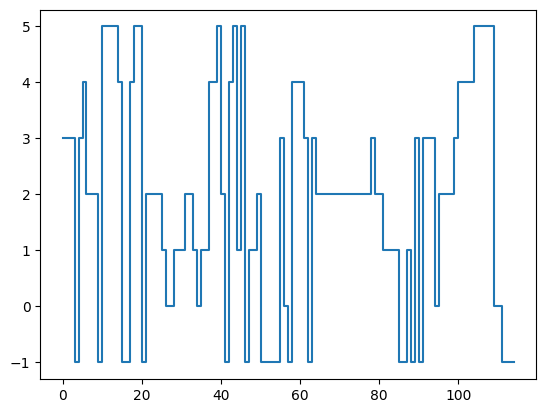

In [10]:
from matplotlib import pyplot as plt

plt.step(list(range(len(mask))), mask)
plt.show()

We need to evaluate the clustering

In [11]:
import mypackage.clustering.metrics
importlib.reload(mypackage.clustering.metrics)
mypackage.clustering.metrics.chain_clustering_silhouette_score(merged, labels)

0.09086364
